# Le diabète en Naive Bayes 

Nous allons aujourd'hui étudier le diabète dans les population d'indiens d'amérique. Regardons comment Naive Bayes peut nous aider dans la prédiction de diabiète 

0. Importez les librairies usuelles 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
diabetes = pd.read_csv('pima-indians-diabetes.csv', sep=",", header=None)
sns.set(rc={'figure.figsize':(8,5)})

1. Importez le dataset dans un DataFrame 

In [10]:
diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes.columns = columns

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Faites une description du dataset

In [18]:
diabetes.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [15]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. Il semblerait que nous ayons des valeurs aberrantes. Enlevez toutes les valeurs pour lesquelles l'insuline est à plus de 3 écart-types de la moyenne 

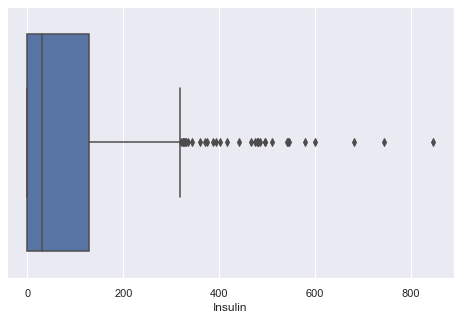

In [20]:
sns.boxplot(diabetes.Insulin)

In [21]:
diabetes.Insulin.mean()

79.79947916666667

In [59]:
stdInsulin3 = diabetes.Insulin.mean() + diabetes.Insulin.std()*3

In [60]:
mask = diabetes.Insulin > stdInsulin3

In [61]:
diabetes_filtered = diabetes[-mask]

4. Faites un boxplot pour voir la répartition de l'Insuline dans le dataset 

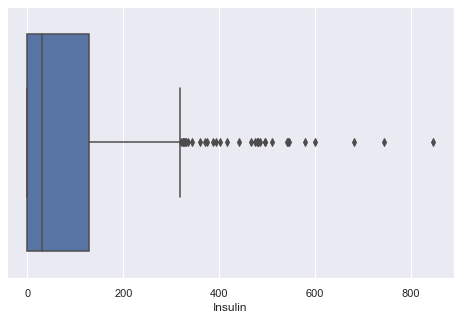

In [84]:
sns.boxplot(diabetes.Insulin)

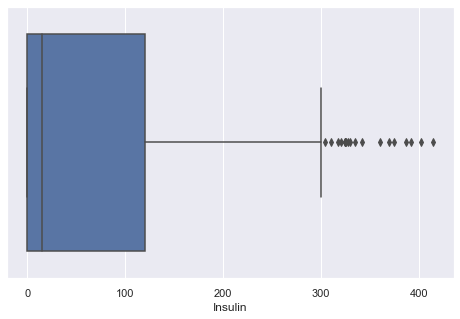

In [63]:
sns.boxplot(diabetes_filtered.Insulin)

In [82]:
def plotBoxplot(df):
    fig, axes = plt.subplots(2, 4, figsize=(18, 10))
    sns.despine(left=True)

    sns.boxplot(df.Pregnancies, ax=axes[0, 0])
    sns.boxplot(df.Glucose, ax=axes[0, 1])
    sns.boxplot(df.BloodPressure, ax=axes[0, 2])
    sns.boxplot(df.SkinThickness, ax=axes[0, 3])
    sns.boxplot(df.Insulin, ax=axes[1, 0])
    sns.boxplot(df.BMI, ax=axes[1, 1])
    sns.boxplot(df.Age, ax=axes[1, 2])

    fig.delaxes(axes[1][3])

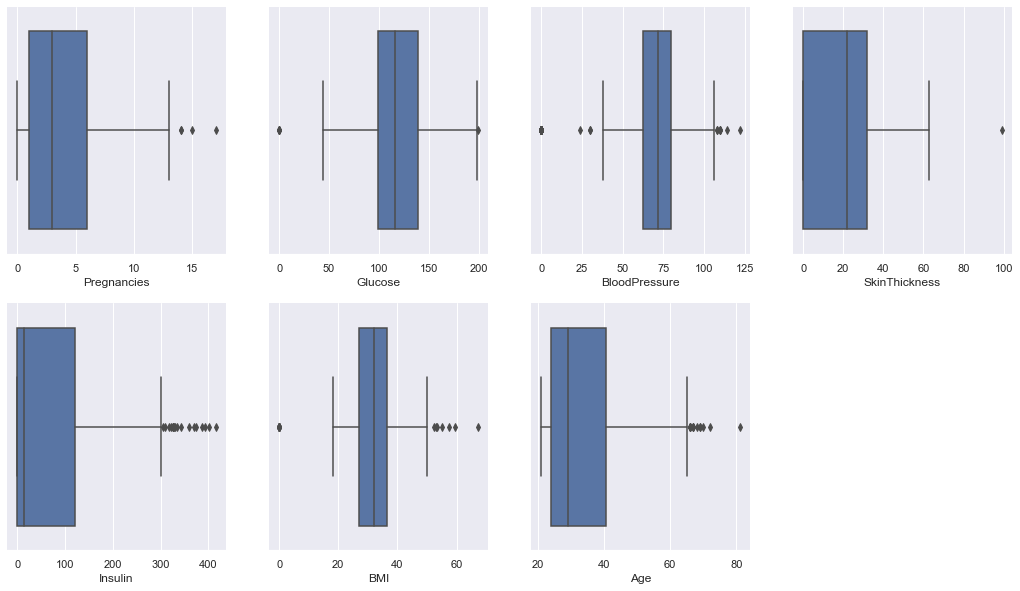

In [83]:
plotBoxplot(diabetes_filtered)

In [64]:
diabetes_filtered.Insulin.mean()

68.54266666666666

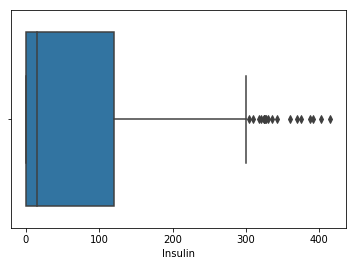

5. Regardez la distribution de chacune de vos colonnes 

In [72]:
def plotDistributions(df):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    sns.despine(left=True)

    sns.distplot(df.Pregnancies, ax=axes[0, 0])
    sns.distplot(df.Glucose, ax=axes[0, 1])
    sns.distplot(df.BloodPressure, ax=axes[0, 2])
    sns.distplot(df.SkinThickness, ax=axes[0, 3])
    sns.distplot(df.Insulin, ax=axes[1, 0])
    sns.distplot(df.BMI, ax=axes[1, 1])
    sns.distplot(df.Age, ax=axes[1, 2])

    fig.delaxes(axes[1][3])

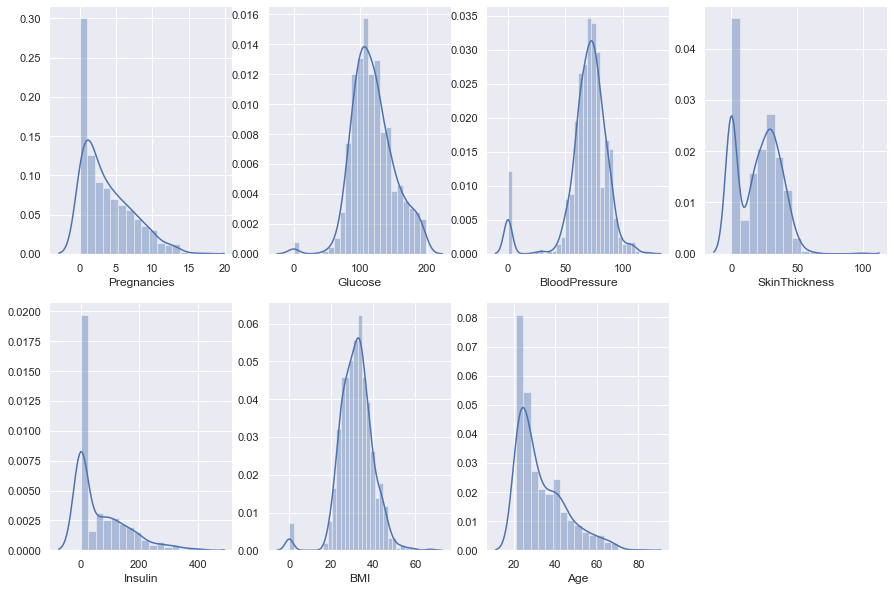

In [73]:
plotDistributions(diabetes_filtered)

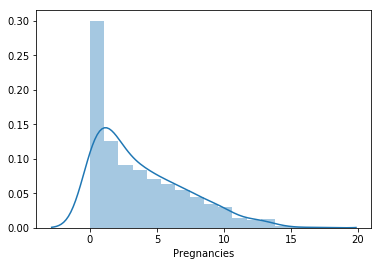

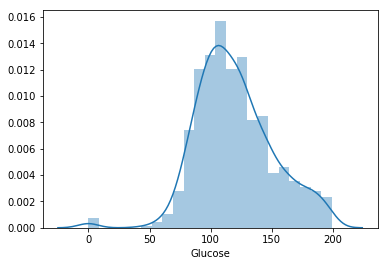

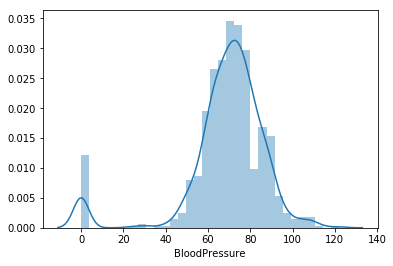

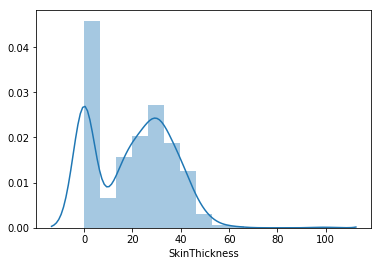

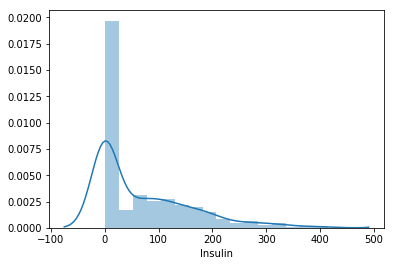

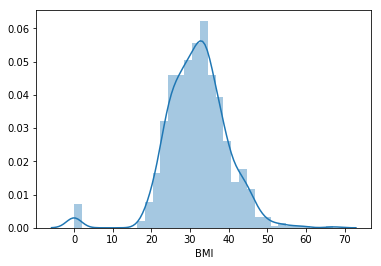

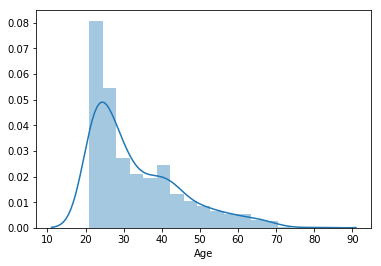

6. On voit que nous avons encore des valeurs qui semblent aberrantes. Reproduisons la même techniques que nous avons utilisée plus haut pour retirer les valeurs aberrantes 

In [90]:
diabetes_filtered.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [95]:
maskPregnancies = diabetes_filtered.Pregnancies < 15
maskSkinThickness =  0 < diabetes_filtered.SkinThickness < 90 
maskInsulin = diabetes_filtered.Insulin > 0
maskAge = 0 < diabetes_filtered.Age < 80
maskBloodPressure = diabetes_filtered.BloodPressure > 0
maskBMI = 0 < diabetes_filtered.BMI < 60

#diabetes_filtered2 = diabetes_filtered[mask2]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [78]:
diabetes_filtered2.mean()

Pregnancies                   4.512461
Glucose                     119.520249
BloodPressure                69.369159
SkinThickness                19.881620
Insulin                      68.549844
BMI                          31.509346
DiabetesPedigreeFunction      0.458593
Age                          34.132399
Outcome                       0.342679
dtype: float64

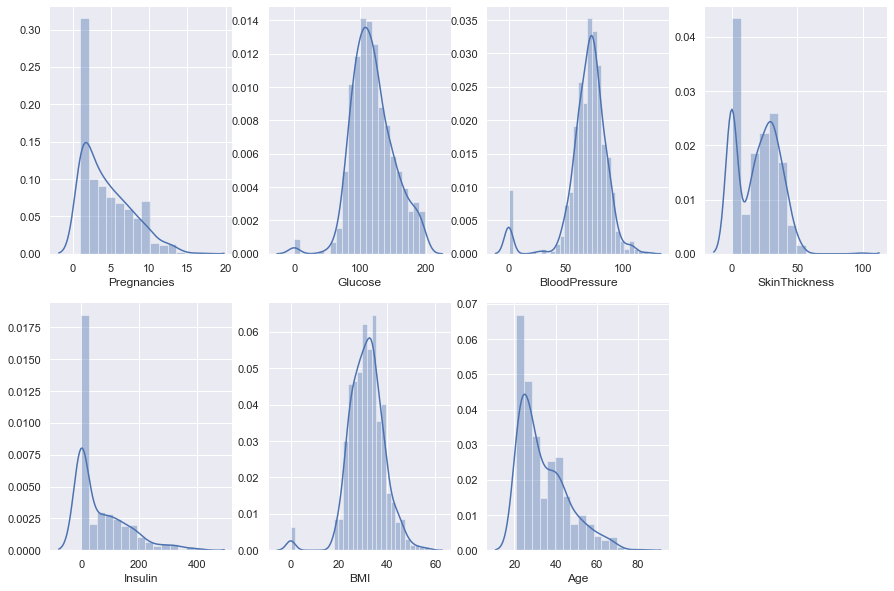

In [76]:
plotDistributions(diabetes_filtered2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1


7. Remplacez les valeurs NaN par une interpolation

8. Passons maintenant par une phase de normalisation. Normalisez toutes vos variables explicatives puis stockez les dans une variable X.

array([[ 0.65486907,  0.92067587, -0.02631511, ...,  0.20426027,
         0.64822311,  1.5117796 ],
       [-0.85126954, -1.18305191, -0.51767609, ..., -0.85231043,
        -0.35015624, -0.17138778],
       [ 1.25732451,  2.08941353, -0.68146308, ..., -1.35040805,
         0.81100236, -0.08280002],
       ...,
       [ 0.35364135,  0.01907825, -0.02631511, ..., -0.9126859 ,
        -0.73359178, -0.25997554],
       [-0.85126954,  0.18604077, -1.00903707, ..., -0.32402508,
        -0.35739087,  1.24601633],
       [-0.85126954, -0.91591188, -0.1901021 , ..., -0.27874348,
        -0.48037963, -0.88008983]])

9. Regardez maintenant la distribution de chacune des variables 

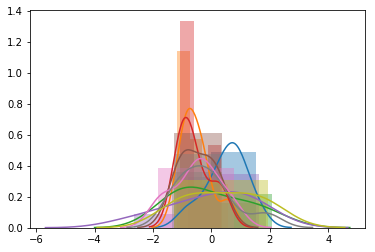

10. Séparez votre dataset en un train et un test set 

11. Importez Gaussian Naive Bayes & entrainez le sur votre données d'entraînement 

12. Regardez votre performance 

0.7377777777777778

13. Voyons si nous pouvons améliorer notre modèle. Faites un pointplot sur chacune des varaibles par rapport à l'outcome. Pourrait-on créer de nouvelles variables ? 

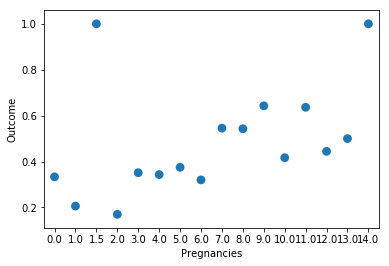

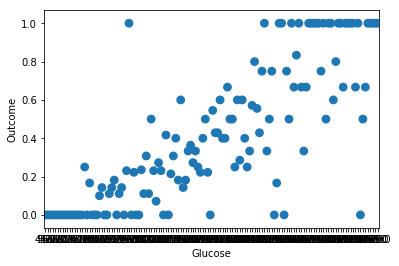

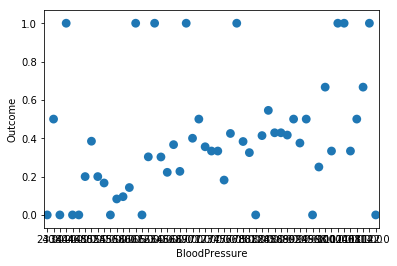

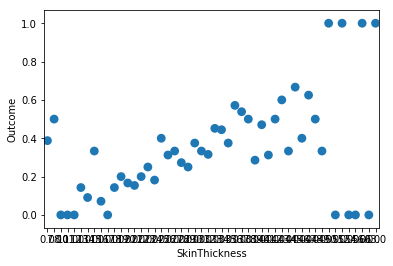

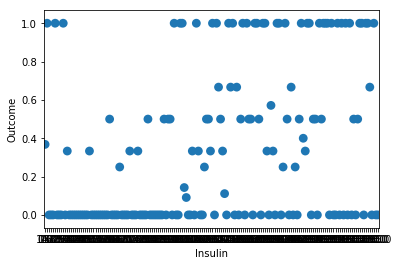

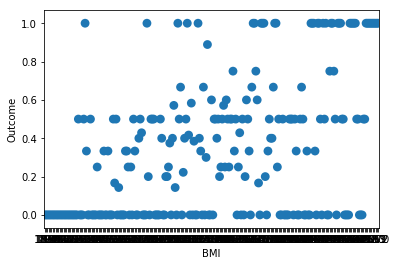

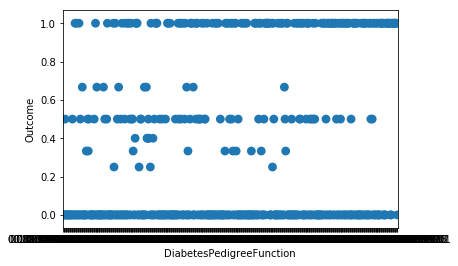

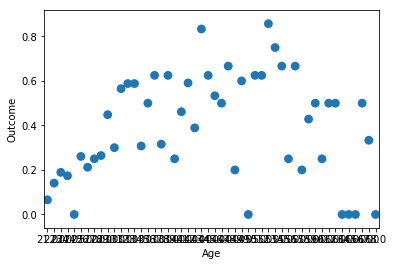

14. Faisons un modèle de Bagging avec Naive Bayes. En utilisant le module ```BaggingClassifier```, Tentez de créer un nouveau modèle

0.7377777777777778

15. Tentez de refaire votre modèle cette fois avec Bernouilli Naive Bayes 

0.7511111111111111

16. Refaites un modèle de Bagging pour voir si vous pouvez encore améliorer votre score 

0.7511111111111111